# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  **This paper is about data tidying, which is a small, but important, component of data cleaning that involves structuring and organizing data sets in a manner that makes them easy to manipulate, model, and visualize.**

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  **The "tidy data standard" intends to facilitate initial exploration and analysis of the data, and to simply the development of data analysis tools that work well together. In this, the "tidy data standard" aims to make initial data cleaning easier by providing a baseline manner of organizing data values within a dataset.**

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it's usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  **The first sentence indicates that, because of the "tidy data standard", a vast majority of, if not all, tidy datasets adhere to the same general structure and organization. Constrastly, a vast majority of, if not all, messy data sets are different from one another, because data sets can contain so many components that can differ in slight nuances, or in general structures.**

  **The second sentence indicates that, for a given data set, it can be easy to identify the type of data that is being analyzed and used, but understanding exactly what the data means and corresponds with and what the findings indicate is a much more difficult and extensive task.**

  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  **Wickham defines values as being usually either numbers, if quantitative, or strings, if qualitative, variables as structures that contain all values that measure the same underlying attribute across units, and observations as structures that contain all values measured on the same unit across attributes.**

  5. How is "Tidy Data" defined in section 2.3?
  **"Tidy Data" is defined as a standard way of mapping the meaning of a dataset to its structure. In "Tidy Data", each variable forms a column, each observation forms a row, and each type of observational unit forms a table.**

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  **The 5 most common problems with messy datasets are as follows: 1. Column headers are values, not variable names. 2. Multiple variables are stored in one column. 3. Variables are stored in both rows and columns. 4. Multiple types of observational units are stored in the same table. 5. A single observational unit is stored in multiple tables.**

  **The data in Table 4 are messy because the dataset is structured in a manner where tabular data is designed for presentation, and, such, the table has variables that form both the rows and columns, its column headers are values, not variable names. In this, the data arrangment is hard to comprehend at first glance, making it messy.**

  **"Melting" a dataset is a data transformation process that involves making wide datasets long or tall by turning the dataset's columns into rows.**

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  **Table 11 is messy because it has variables in individual columns (id, year, month), spread across columns (day, d1-d31), and across rows (tmin, tmax), whereas Table 12 is both tidy because each row represents the meteorological measurements for a single day and all other variables are fixed besides two measured variables (tmin and tmax), and "molten" because, instead of values, the element column contains names of variables, and missing values are dropped to conserve space.**

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
  **The "chicken-and-egg problem" with focusing on tidy data is the fact that, if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data. This issue makes it easy to get stuck in a local maxima where independently changing data structures or data tools will not improve workflow.**

  **Wickham hopes that, in the future, with further work on the subject of data wrangling, others build on the existing framework to develop even better data storage strategies and better tools. Additionally, Wickham hopes that other frameworks can and will be developed to make the many tedious and laborious tasks of data cleaning easier.**



**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [17]:
#1
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/ronitreddy/assignment2/main/data/airbnb_hw.csv'
df = pd.read_csv(url, low_memory = False)

var = 'Price'
df[var].str.replace('[\$,]', '', regex = True)
df[var] = pd.to_numeric(df[var], errors='coerce')
df[var + '_nan'] = df[var].isnull()
df[var].fillna(np.nan)

print('Total Missing Values: ', sum(df[var + '_nan']))

Total Missing Values:  181


**1.**

**To clean the Price variable, I began by removing symbols like units (e.g. $) or separators (e.g. 1,000) to preserve as much data as possible using df[var].str.replace(pattern, replacement). From there, I coerced the values to numeric using the Pandas method pd.to_numeric(var). Finally, I created a missing value dummy variable using df[var].isnull() and imputed a value using df[var].fillna(value) to the missing values.**

**I ended up with 181 missing values.**

In [18]:
#2
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/ronitreddy/assignment2/main/data/sharks.csv'
df = pd.read_csv(url, low_memory = False)

var = 'Type'
print(df[var].unique(), '\n')
df[var] = df[var].replace(' ', np.nan)
df[var] = df[var].replace('Boatomg', 'Boating')
print(df[var].value_counts(), '\n')

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  93
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Name: Type, dtype: int64 



**2. To clean the Type variable, I replaced missing values with np.nan, replaced the singular 'Boatomg' value (which appeared to be a typo) with the value 'Boating', and created a dummy for each qualitative type of missing values.**

In [16]:
#3
import numpy as np
import pandas as pd

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url, low_memory = False)

var = 'WhetherDefendantWasReleasedPretrial'
df.loc[df[var] == 9, var] = np.nan
df.loc[df[var] == 7, var] = np.nan

**3. To clean the WhetherDefendantWasReleasedPretrial variable, I replaced both missing values (where df[var] == 9) and unknown values (where df[var] == 7) with np.nan.**

In [21]:
#4
import numpy as np
import pandas as pd

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url, low_memory = False)

var = 'ImposedSentenceAllChargeInContactEvent'
df[var] = pd.to_numeric(df[var], errors='coerce').round()
df[var] = df[var].replace(' ', np.nan)

**4. To clean the ImposedSentenceAllChargeInContactEvent variable, I converted each value to the numeric type and rounded it to the nearest value (as these numeric values make more sense in the context of imposed sentences), and replaced missing values with np.nan.**

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
#1
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/ronitreddy/assignment2/main/data/college_completion.csv'
df = pd.read_csv(url, low_memory = False)

In [ ]:
#2
print('The dimensions of the data are: ', df.shape)
print('The number of observations is: ', len(df))
print('The variables included are: ', df.columns)
print(df.head())

The dimensions of the data are:  (3798, 63)
The number of observations is:  3798
The variables included are:  Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first'

In [ ]:
#3
pd.crosstab(df['control'], df['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


**3. With this cross tabulation of the control and level variables, I noticed that public universities are predominantly 2-year institutions, while private universities (both for-profit and not-for-profit) are predominantly 4-year institutions.**

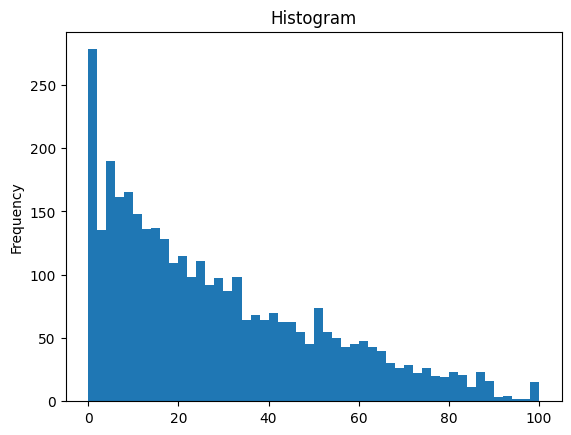

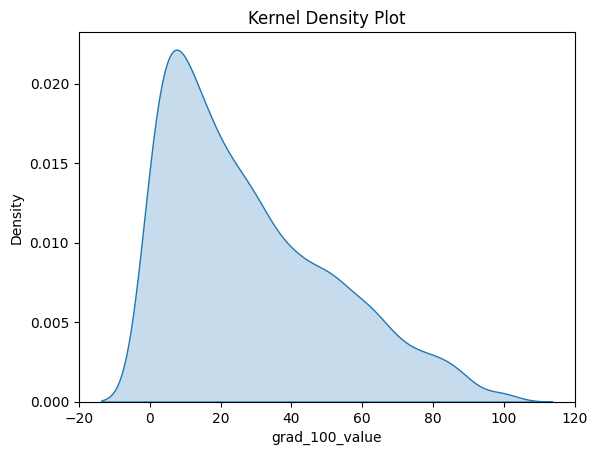

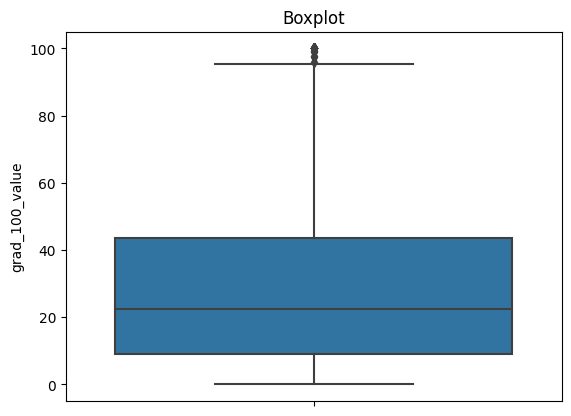

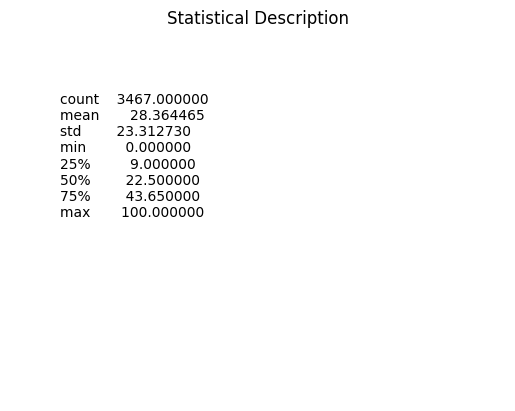

In [ ]:
#4
import matplotlib.pyplot as plt
import seaborn as sns

var = 'grad_100_value'

df[var].plot.hist(bins = 50)
plt.title('Histogram')
plt.show()

sns.kdeplot(df[var], fill = True)
plt.title('Kernel Density Plot')
plt.show()

sns.boxplot(y = var, data = df)
plt.title('Boxplot')
plt.show()

plt.text(0.1, 0.5, df[var].describe().to_string())
plt.axis('off')
plt.title('Statistical Description')
plt.show()

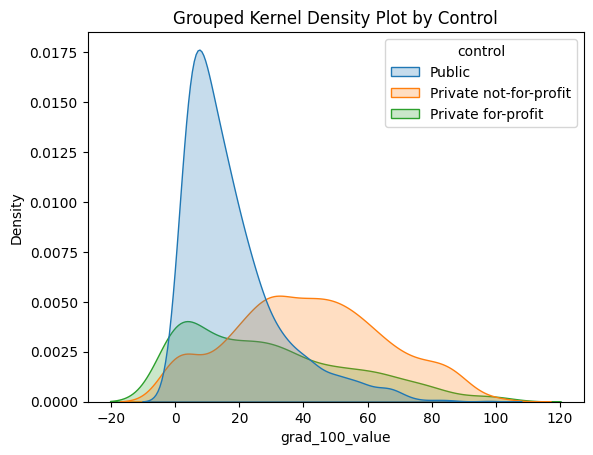

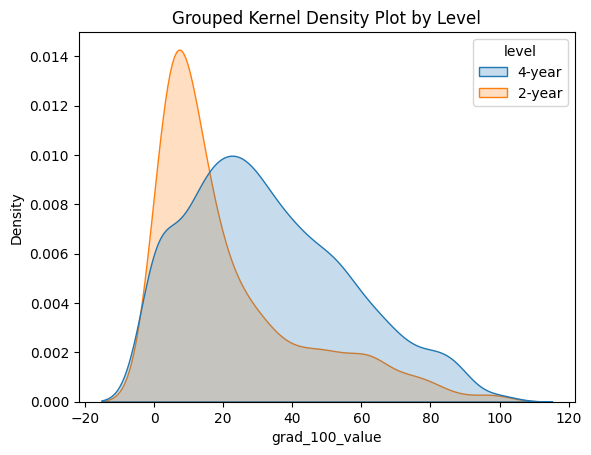

count       mean        std  min     25%  \
control                level                                               
Private for-profit     2-year   461.0  37.197614  25.497380  0.0  15.800   
                       4-year   318.0  17.382704  20.788525  0.0   0.000   
Private not-for-profit 2-year    68.0  41.913235  28.348302  0.0  16.225   
                       4-year  1121.0  41.645674  23.243453  0.0  25.000   
Public                 2-year   926.0  12.400000  10.893600  0.0   5.100   
                       4-year   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
control                level                        
Private for-profit     2-year  33.9  57.800  100.0  
                       4-year  12.5  26.325  100.0  
Private not-for-profit 2-year  44.4  61.200  100.0  
                       4-year  41.0  57.800  100.0  
Public                 2-year   9.4  16.175   97.8  
                       4-year  21.8  33.800   86.3

In [ ]:
#5
import matplotlib.pyplot as plt
import seaborn as sns

var = 'grad_100_value'

sns.kdeplot(data = df, x = var, hue = 'control', fill = True)
plt.title('Grouped Kernel Density Plot by Control')
plt.show()

sns.kdeplot(data = df, x = var, hue = 'level', fill = True)
plt.title('Grouped Kernel Density Plot by Level')
plt.show()

df.groupby(['control', 'level'])['grad_100_value'].describe()

**5.**

**With the grouped kernel density plots, I see that there is great density in the percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time around 15 percent at public institutions for control, and 2-year institutions for level.**

**Based on the grouped calculations of statistical descriptions, it appears that private not-for-profit institutions (particularly those that are 2-year institutions) have the best graduation rates.**

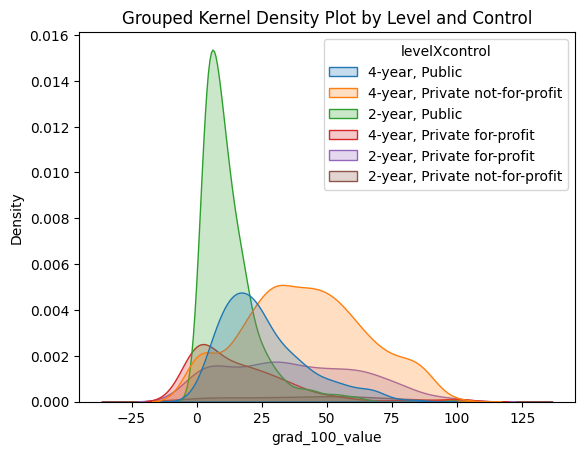

In [ ]:
#6
import matplotlib.pyplot as plt
import seaborn as sns

var = 'grad_100_value'
df['levelXcontrol'] = df['level'] + ', ' + df['control']

sns.kdeplot(data = df, x = var, hue = 'levelXcontrol', fill = True)
plt.title('Grouped Kernel Density Plot by Level and Control')
plt.show()

**6.**

**Based on the grouped kernal density plot by level and control, and, specifically, its distribution of graduation rate density, it appears that, overall, both 2-year and 4-year private not-for-profit institutions have the best graduation rates.**

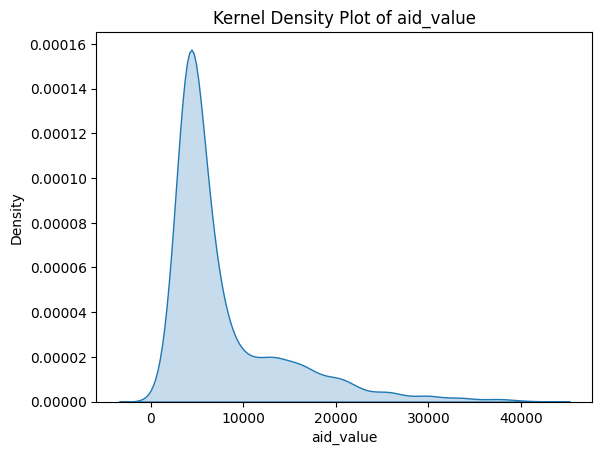

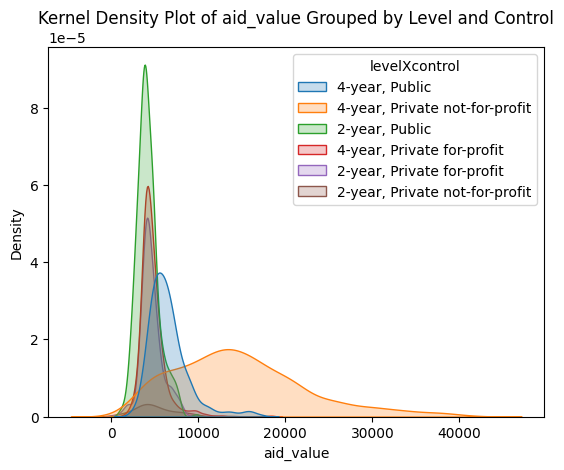

count          mean          std     min  \
control                level                                               
Private for-profit     2-year   464.0   4559.681034  1286.688269   294.0   
                       4-year   527.0   4696.062619  1489.410020  1580.0   
Private not-for-profit 2-year    68.0   5128.058824  2590.449946   934.0   
                       4-year  1180.0  14702.401695  7649.775203   902.0   
Public                 2-year   926.0   4126.199784  1260.271382   881.0   
                       4-year   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
control                level                                        
Private for-profit     2-year  3818.75   4286.5   5122.00   9727.0  
                       4-year  3885.50   4364.0   5131.50  18355.0  
Private not-for-profit 2-year  3650.00   4516.5   6311.50  13654.0  
                       4-year  9113.25  13774.5  18996.75  41580.0  
Public                 2-year  3311.25   3943.5   4762.00   9809.0  
                       4-year  4990.50   6085.0   7341.50  17299.0

In [ ]:
#7
import matplotlib.pyplot as plt
import seaborn as sns

var = 'aid_value'

sns.kdeplot(df[var], fill = True)
plt.title('Kernel Density Plot of aid_value')
plt.show()

sns.kdeplot(data = df, x = var, hue = 'levelXcontrol', fill = True)
plt.title('Kernel Density Plot of aid_value Grouped by Level and Control')
plt.show()

df.groupby(['control', 'level'])[var].describe()

**7.**

**The bi-modal nature of the graph is explained by the fact that the majority of institutions provide an average of roughly 4500 dollars in aid-value, causing the first spike around this value, while 4-year private (not-for-profit) institutions provide an average of roughly 14500 dollars in aid-value, causing the second spike around this value.**

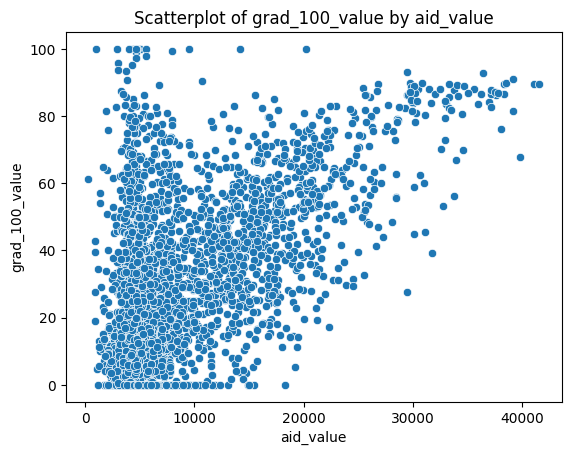

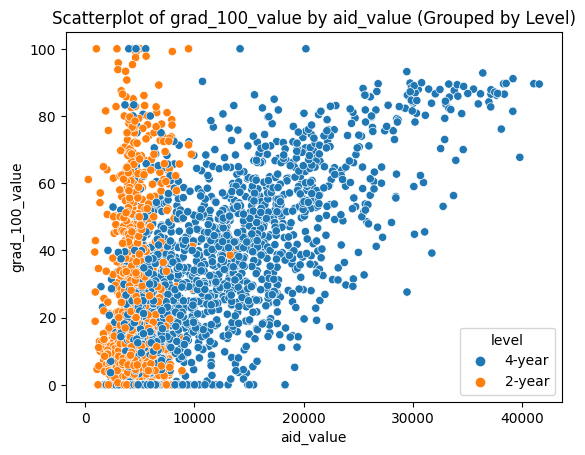

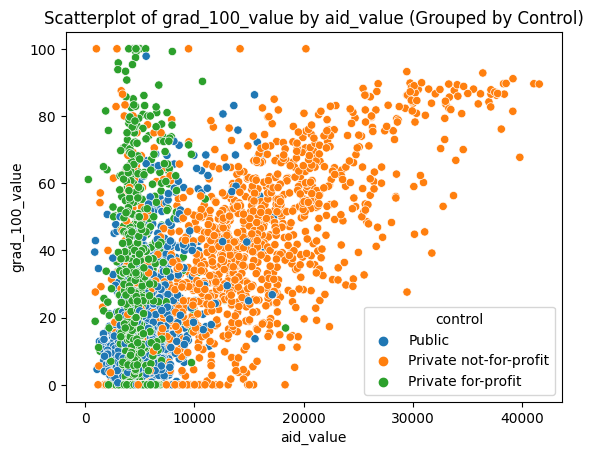

In [ ]:
#8
import matplotlib.pyplot as plt
import seaborn as sns

var1 = 'aid_value'
var2 = 'grad_100_value'

sns.scatterplot(data = df, x = var1, y = var2)
plt.title('Scatterplot of grad_100_value by aid_value')
plt.show()

sns.scatterplot(data = df, x = var1, y = var2, hue = 'level')
plt.title('Scatterplot of grad_100_value by aid_value (Grouped by Level)')
plt.show()

sns.scatterplot(data = df, x = var1, y = var2, hue = 'control')
plt.title('Scatterplot of grad_100_value by aid_value (Grouped by Control)')
plt.show()

**8.**

**In the original scatterplot, I see a positive linear trend present between the variables aid_value and grad_100_value.**

**In the scatterplot grouped by level, I see a positive linear trend present between the variables aid_value and grad_100_value corresponding with 4-year institutions, and a vertical linear strend present between the variables aid_value and grad_100_value corresponding with 2-year institutions.**

**In the scatterplot grouped by control, I see a random cluster centered around 5000 dollars for aid_value and 30 percent for grad_100_value present between the variables aid_value and grad_100_value corresponding with public institutions, a positive linear trend present between the variables aid_value and grad_100_value corresponding with private not-for-profit institutions, and a vertical linear strend present between the variables aid_value and grad_100_value corresponding with private for-profit institutions.**

**Based on these findings, aid seems to increase graduation rates for 4-year institutions, and private not-for-profit institutions.**

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.